# Plot integrated EKE budgets (Figures 10, 11) and backscatter (Figure 12)

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.pylab as pylab

In [2]:
import numpy as np
import xarray as xr
from xgcm import Grid
from dask.diagnostics import ProgressBar

In [5]:
# Filter Specs
filter_fac_list = [16, 32, 64, 128]
exp_list = [
    r'filter scale: 0.5$^\circ$',
    r'filter scale: 1$^\circ$',
    r'filter scale: 2$^\circ$',
    r'filter scale: 4$^\circ$'
]

run = 'nw2_0.03125deg_N15_baseline_hmix20'
basepath = '/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/'
workpath = '/glade/work/noraloose/' 

In [6]:
st = xr.open_dataset('%s/%s/static.nc' % (basepath,run), decode_times=False)

# for 500 day averages
ds_list = []
for filter_fac in filter_fac_list:
    ds = xr.open_dataset('%s/%s/bleck_cycle_fac%i_500days.nc' % (workpath, run, filter_fac), decode_times=False)
    ds_list.append(ds)

In [7]:
from xgcm import Grid
coords = {'X': {'center': 'xh', 'outer': 'xq'},
            'Y': {'center': 'yh', 'outer': 'yq'}
         }

grid = Grid(st, coords=coords, periodic=['X'])

st['dxT'] = grid.interp(st.dxCu,'X')
st['dyT'] = grid.interp(st.dyCv,'Y')

### Plotting

In [8]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'font.size': 14}
pylab.rcParams.update(params)
from matplotlib.ticker import MultipleLocator

## Zonal integrals (Figure 10)

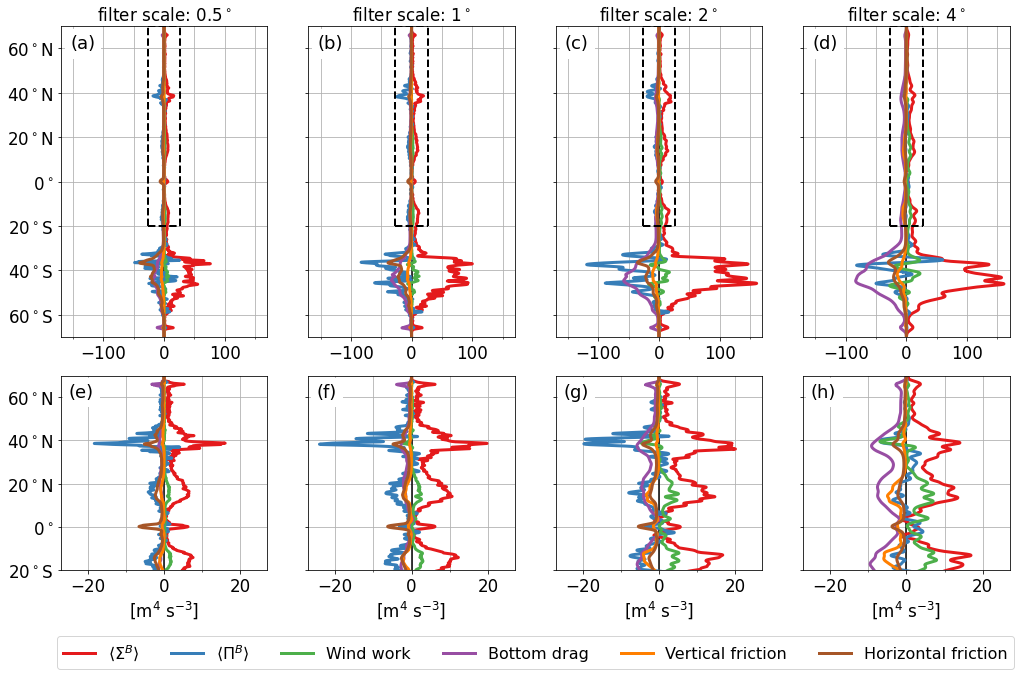

In [12]:
fldlist = [
    'EKE_production_TWA', 'work_eddy_momentum_fluxes_TWA', 
    'EKE_wind_stress_TWA', 'EKE_bottom_drag_TWA', 'EKE_vertical_viscosity_TWA', 'EKE_horizontal_viscosity_TWA'
]
labellist = [r'$\langle\Sigma^B\rangle$', r'$\langle\Pi^B\rangle$', 'Wind work', 'Bottom drag', 'Vertical friction', 'Horizontal friction']
colorlist = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#a65628']

xlim1 = 170
xlim2 = 27

fig = plt.figure(figsize=(17,10))
gs = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(gs[:3, 0])
ax1 = fig.add_subplot(gs[:3, 1])
ax2 = fig.add_subplot(gs[:3, 2])
ax3 = fig.add_subplot(gs[:3, 3])

abc_list = ['(a)', '(b)', '(c)', '(d)']
for dst, ax, exp, abc in zip (ds_list, [ax0, ax1, ax2, ax3], exp_list, abc_list):

    for fld, label, color in zip(fldlist, labellist, colorlist):
        (dst[fld] * st.dxT).sum(dim='xh').plot(ax=ax, y='yh', linewidth=3, label=label, color=color)

    ax.vlines(0, -70, 70, color='k')

    ax.set(ylabel='', xlabel='', title='%s' %exp)
    ax.set_yticks(ticks=np.arange(-60.01, 60, 20))
    ax.set(yticklabels=[r'60$^\circ$S', r'40$^\circ$S', r'20$^\circ$S',  r'0$^\circ$',  r'20$^\circ$N', r'40$^\circ$N', r'60$^\circ$N'])
    ax.set_ylim(-70, 70)
    ax.set_xlim(-xlim1, xlim1) 
    ax.xaxis.set_minor_locator(MultipleLocator(50)) 
    #ax.set_xticks(ticks=np.arange(-150, 150, 50))
    ax.grid(axis='x', which='both')
    ax.grid(axis='y', which='major')
    # box
    ax.plot([-xlim2, -xlim2], [-20, 70], 'k', linewidth=2, linestyle='dashed')
    ax.plot([xlim2, xlim2], [-20, 70], 'k', linewidth=2, linestyle='dashed')
    ax.plot([-xlim2, xlim2], [-20, -20], 'k', linewidth=2, linestyle='dashed')
    ax.plot([-xlim2, xlim2], [70, 70], 'k', linewidth=2, linestyle='dashed')   
    ax.text(-xlim1+15, 60, abc, backgroundcolor='w', fontsize=18)
ax4 = fig.add_subplot(gs[3:, 0])
ax5 = fig.add_subplot(gs[3:, 1])
ax6 = fig.add_subplot(gs[3:, 2])
ax7 = fig.add_subplot(gs[3:, 3])

abc_list = ['(e)', '(f)', '(g)', '(h)']
for dst, ax, exp, abc in zip (ds_list, [ax4, ax5, ax6, ax7], exp_list, abc_list):

    for fld, label, color in zip(fldlist, labellist, colorlist):
        (dst[fld] * st.dxT).sum(dim='xh').plot(ax=ax, y='yh', linewidth=3, label=label, color=color)

    ax.vlines(0, -70, 70, color='k')

    ax.grid(axis='x', which='both')
    ax.grid(axis='y', which='major')
    
    ax.set(ylabel='', xlabel=r'[m$^4$ s$^{-3}$]', title='')
    ax.set_yticks(ticks=np.arange(-20, 61, 20))
    ax.set(yticklabels=[r'20$^\circ$S',  r'0$^\circ$',  r'20$^\circ$N', r'40$^\circ$N', r'60$^\circ$N'])
    ax.set_ylim(-20, 70)
    ax.set_xlim(-xlim2, xlim2)    
    ax.xaxis.set_minor_locator(MultipleLocator(10)) 
    ax.text(-xlim2+2, 60, abc, backgroundcolor='w', fontsize=18)
ax1.set(yticklabels=[])
ax2.set(yticklabels=[]) 
ax3.set(yticklabels=[]) 
ax5.set(yticklabels=[])
ax6.set(yticklabels=[])   
ax7.set(yticklabels=[])  
ax.legend(bbox_to_anchor=(-1.3,-0.3), loc="upper center", fontsize=16, ncol=7)

fig.subplots_adjust(hspace=0.5)
figname = 'figures/EKE_budget_zonal.png'
plt.savefig(figname,dpi=200,bbox_inches='tight',pad_inches=0)

## Meridional integrals (Figure 11)

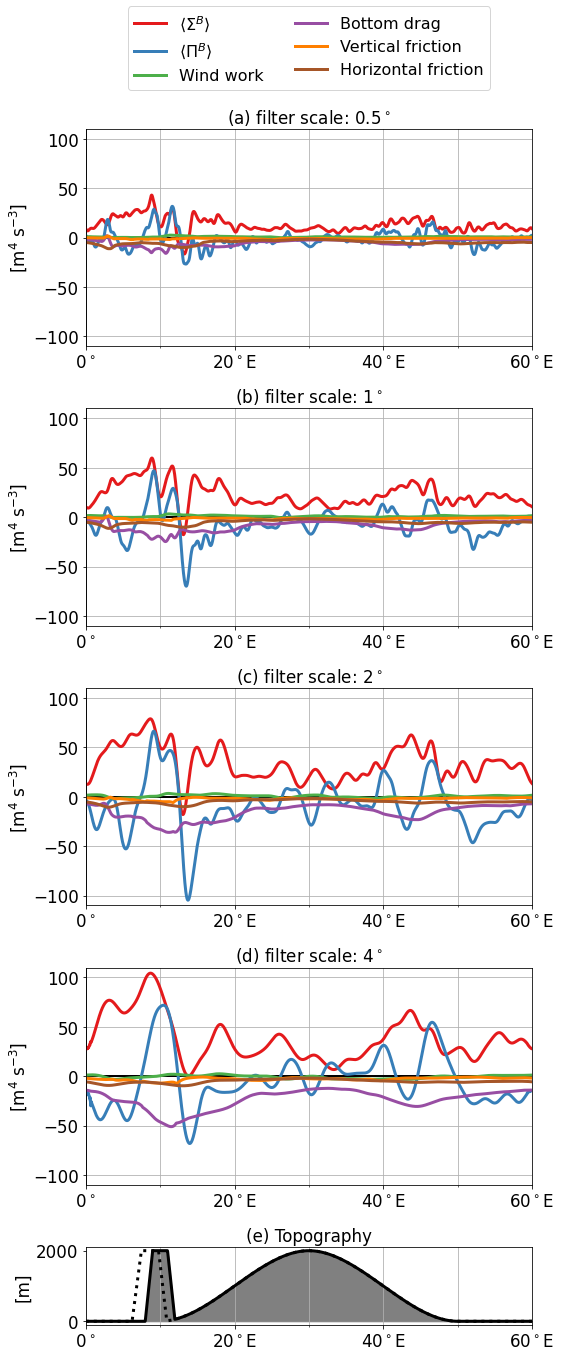

In [13]:
yslice = slice(-60, -40)

fldlist = [
    'EKE_production_TWA', 'work_eddy_momentum_fluxes_TWA', 
    'EKE_wind_stress_TWA', 'EKE_bottom_drag_TWA', 'EKE_vertical_viscosity_TWA', 'EKE_horizontal_viscosity_TWA'
]
labellist = [r'$\langle\Sigma^B\rangle$', r'$\langle\Pi^B\rangle$', 'Wind work', 'Bottom drag', 'Vertical friction', 'Horizontal friction']
colorlist = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#a65628']

ylim = 110

fig = plt.figure(figsize=(8,22))
gs = fig.add_gridspec(9, 1)

ax0 = fig.add_subplot(gs[0:2, 0])
ax1 = fig.add_subplot(gs[2:4, 0])
ax2 = fig.add_subplot(gs[4:6, 0])
ax3 = fig.add_subplot(gs[6:8, 0])

abc_list = ['(a)', '(b)', '(c)', '(d)']


for dst, ax, exp, abc in zip (ds_list, [ax0, ax1, ax2, ax3], exp_list, abc_list):

    for fld, label, color in zip(fldlist, labellist, colorlist):
        (dst[fld] * st.dyT).sel(yh=yslice).sum(dim='yh').plot(ax=ax, linewidth=3, label=label, color=color)

    ax.vlines(0, -ylim, ylim, color='k')
    ax.set(ylabel='', xlabel='', title='%s %s' %(abc, exp))
    ax.hlines(0, 0, 60, color='k', linewidth=2)
    ax.set_ylim(-ylim, ylim)
    ax.set_xlim(0, 60)  
    ax.set_xticks(ticks=np.arange(0, 61, 20))
    ax.set(xticklabels=[r'0$^\circ$', r'20$^\circ$E', r'40$^\circ$E',  r'60$^\circ$E'])
    ax.grid(axis='x', which='both')
    ax.grid(axis='y', which='major')
    ax.xaxis.set_minor_locator(MultipleLocator(10))    
    ax.set(ylabel=r'[m$^4$ s$^{-3}$]') 
 
ax0.legend(bbox_to_anchor=(0.5,1.6), loc="upper center", fontsize=16, ncol=2)

# topography

ax4 = fig.add_subplot(gs[8, 0])


for ax in [ax4]:
    topo = (4000-st.depth_ocean).sel(yh=-50, method='nearest')
    topo2 = (4000-st.depth_ocean).sel(yh=-45, method='nearest')
    
    topo.plot(ax=ax, linewidth=3, color='k')
    topo2.plot(ax=ax, linewidth=3, linestyle='dotted', color='k')
    
    ax.fill_between(st.xh, 0, topo, color='gray')
    ax.set_xlim(0, 60)  
    ax.set_xticks(ticks=np.arange(0, 61, 20))
    ax.set(xticklabels=[r'0$^\circ$', r'20$^\circ$E', r'40$^\circ$E',  r'60$^\circ$E'])
    ax.set_yticks(ticks=[0,2000])
    ax.set(title='(e) Topography', ylabel='[m]', xlabel='')
    ax.grid(axis='x', which='both')
    ax.xaxis.set_minor_locator(MultipleLocator(10)) 

fig.subplots_adjust(hspace=0.8)

figname = 'figures/EKE_budget_meridional.png'
plt.savefig(figname,dpi=200,bbox_inches='tight',pad_inches=0)

### Ratio $\int \mathcal{R}^B dx / \int \mathcal{S}^B dx$

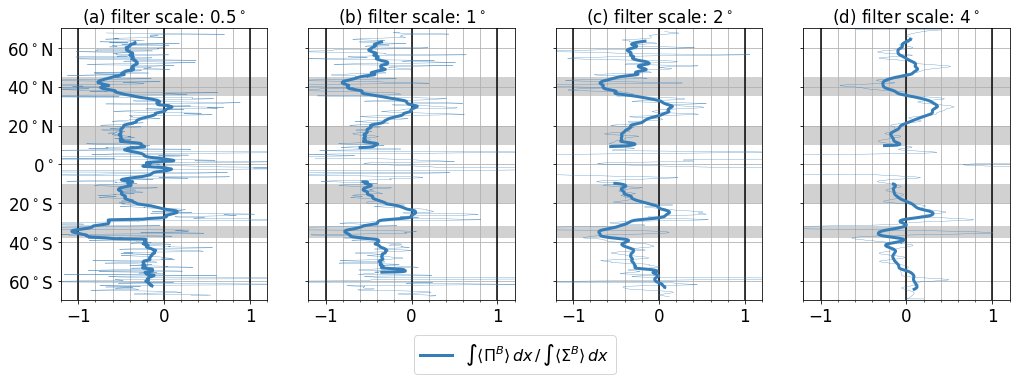

In [15]:
lat_roll = 10 # rolling mean over what latitude window?
threshold = 0.1
lat_colors = ['#ffff33', '#f781bf', 'gray', 'gray', '#f781bf']
lat_slices = [slice(-38, -32), slice(-20, -10), slice(10, 20), slice(35,45)]

fig, axs = plt.subplots(1,4, figsize=(17,5))

abc_list = ['(a)', '(b)', '(c)', '(d)']
for dst, ax, exp, abc in zip (ds_list, axs, exp_list, abc_list):
    source_zonal_integral = (dst['EKE_production_TWA'] * st.dxT).sum(dim='xh')
    
    reynolds_zonal_integral = (dst['work_eddy_momentum_fluxes_TWA'] * st.dxT).sum(dim='xh')
    ratio = (reynolds_zonal_integral / source_zonal_integral).where(source_zonal_integral>threshold)
    rolling_mean = ratio.rolling(yh= int(32 * lat_roll), center=True).mean()
    ratio.plot(ax=ax, y='yh', linewidth=0.3, color='#377eb8')
    rolling_mean.plot(ax=ax, y='yh', linewidth=3, color='#377eb8', 
                      label = r'$\int \langle\Pi^B \rangle\, dx \,/\, \int \langle\Sigma^B \rangle\, dx$'
                     )
    for lat_slice, lat_color in zip(lat_slices, lat_colors):
        ax.axhspan(lat_slice.start, lat_slice.stop, facecolor='0.1', alpha=0.2)
        
    ax.vlines(0, -70, 70, color='k')
    ax.vlines(-1, -70, 70, color='k')
    ax.vlines(1, -70, 70, color='k')
    ax.set(ylabel='', xlabel='', title='%s %s' %(abc, exp))
    ax.set_yticks(ticks=np.arange(-60.01, 60, 20))
    ax.set(yticklabels=[r'60$^\circ$S', r'40$^\circ$S', r'20$^\circ$S',  r'0$^\circ$',  r'20$^\circ$N', r'40$^\circ$N', r'60$^\circ$N'])
    ax.set_ylim(-70, 70)
    ax.set_xlim(-1.2, 1.2) 
    ax.set_xticks(ticks=np.arange(-1,2,1))
    ax.xaxis.set_minor_locator(MultipleLocator(0.2)) 
    #ax.grid('on')
    ax.grid(which='both')

    
axs[2].legend(bbox_to_anchor=(-0.2,-0.3), loc="lower center", fontsize=16, ncol=6)

for ax in [axs[1], axs[2], axs[3]]:
    ax.set(yticklabels=[])

figname = 'figures/ratio.png'

plt.savefig(figname,dpi=200,bbox_inches='tight',pad_inches=0)